# TP 2

#### Reutilizamos el codigo hecho para el TP1:

In [1]:
import pandas as pd
datos_05 = pd.read_stata("usu_individual_T105.dta")
datos_25 = pd.read_excel("usu_individual_T125.xls")

In [2]:
# Ponemos en minuscula los nombres de cada base de datos para que las columnas tengan  el mismo nombre
datos_05.columns = datos_05.columns.str.lower()
datos_25.columns = datos_25.columns.str.lower()

In [3]:
# Filtrar por región
# Cambiar los valores de region en la base de datos 2005 a numero
region_dic = {
    "Gran Buenos Aires": 1,
    "NOA": 40,
    "NEA": 41,
    "Cuyo": 42,
    "Pampeana": 43,
    "Patagónica": 44
}

# Reemplaza los valores de texto por números en la misma columna
datos_05["region"] = datos_05["region"].replace(region_dic)

datos_05 = datos_05[datos_05["region"] == 40]
datos_25 = datos_25[datos_25["region"] == 40]

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/1740833018.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_05["region"] = datos_05["region"].replace(region_dic)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/1740833018.py:13: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  datos_05["region"] = datos_05["region"].replace(region_dic)


In [4]:
# Unir las bases de datos
datos = pd.concat([datos_05, datos_25])
datos.reset_index(drop=True) # index original es descartado

,codusu,nro_hogar,componente,h15,ano4,trimestre,region,mas_500,aglomerado,pondera,...,v21_03_m,v22_01_m,v22_02_m,v22_03_m,p_deccf,p_rdeccf,p_gdeccf,p_pdeccf,p_ideccf,p_adeccf
0,125666,1.0,1.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,125666,1.0,2.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,125666,1.0,3.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,125666,1.0,4.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,125666,1.0,5.0,Sí,2005.0,1er. Trimestre,40,N,Santiago del Estero - La Banda,301.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19085,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,1,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19086,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,2,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19087,TQRMNOQYSHMKKRCDEHIBB00882443,1.0,3,1,2025.0,1,40,N,22,184.0,...,0.0,0.0,0.0,0.0,10.0,10.0,NaN,10.0,10.0,10.0
19088,TQRMNOPPVHKOKSCDEHIBB00860370,1.0,1,1,2025.0,1,40,N,22,108.0,...,0.0,0.0,0.0,0.0,7.0,8.0,NaN,7.0,8.0,8.0


In [5]:
# Selección de variables
datos = datos[["codusu","region", "ano4", "ch03", "ch04","ch06", "ch07", "ch08", "ch09", "ch10", "ch12","ch13","ch14", "ch15", "ch16", "nivel_ed", "estado", "cat_inac","ipcf", "cat_ocup","itf","pp3e_tot","pp3f_tot"]]

In [6]:
def reemplazar_valores(columna, diccionario): # Función para reemplezar variables
    """
    Parámetros:
    - columna: nombre de la columna a modificar
    - diccionario: dict, mapeo {valor_original: valor_nuevo}
    """
    datos[columna] = datos[columna].replace(diccionario)
    datos[columna] = datos[columna].astype(float)

In [7]:
# Diccionarios para cambiar valores de las variables de 2005
sexo_dic = {
    "Varón":1,
    "Mujer":2
}
estado_civil_dic = {
    "Unido":1,
    "Casado":2,
    "Separado o divorciado":3,
    "Viudo":4,
    "Soltero":5,
}
cobertura_dic = {
    "Obra social (incluye PAMI)": 1,
    "Mutual/Prepaga/Servicio de emergencia": 2,
    "Planes y seguros públicos": 3,
    "No paga ni le descuentan": 4,
    "Ns./Nr.": 9,
    "Obra social y mutual/prepaga/servicio de emergencia": 12,
    "Obra social y planes y seguros públicos": 13,
    "Mutual/prepaga/servicio de emergencia y planes y seguros públicos": 23,
    "Obra social y mutual/prepaga/servicio de emergencia y planes y seguros públicos": 123
}
edu_dic = {
    "Primaria Incompleta (incluye educación especial)": 1,
    "Primaria Completa": 2,
    "Secundaria Incompleta": 3,
    "Secundaria Completa": 4,
    "Superior Universitaria Incompleta": 5,
    "Superior Universitaria Completa": 6,
    "Sin instrucción": 7,
    "Ns./Nr.": 9
}
estado_dic = {
    "Entrevista individual no realizada (no respuesta al cuestion": 0,
    "Ocupado": 1,
    "Desocupado": 2,
    "Inactivo": 3,
    "Menor de 10 años": 4
}
cat_dic = {
    "Jubilado/pensionado": 1,
    "Rentista": 2,
    "Estudiante": 3,
    "Ama de casa": 4,
    "Menor de 6 años": 5,
    "Discapacitado": 6,
    "Otros": 7
}
ch03_dic = {
    "Jefe": 1,
    "Cónyuge/Pareja": 2,
    "Hijo/Hijastro": 3,
    "Yerno/Nuera": 4,
    "Nieto": 5,
    "Madre/Padre": 6,
    "Suegro": 7,
    "Hermano": 8,
    "Otros familiares": 9,
    "No familiares": 10
}
leer_dic = {
    "Sí": 1,
    "No": 2,
    "Menor de 2 años": 3
}
cat_ocup_dic = {
    "Patrón": 1,
    "Cuenta propia": 2,
    "Obrero o empleado": 3,
    "Trabajador familiar sin remuneración": 4,
    "Ns./Nr.": 9
}
ch10_dic= {
    "Sí, asiste": 1,
    "No asiste, pero asistió": 2,
    "Nunca asistió": 3
}
ch15_dic = {
    "En esta localidad": 1,
    "En otra localidad": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "Ns./Nr.": 9
}
ch16_dic = {
    "En esta localidad": 1,
    "En otra localidad de esta provincia": 2,
    "En otra provincia (especificar)": 3,
    "En un país limítrofe": 4,
    "En otro país": 5,
    "No había nacido": 6,
    "Ns./Nr.": 9
}
ch14_dic = {
    '00': 0,
    '01': 1,
    '02': 2,
    '03': 3,
    '04': 4,
    '05': 5,
    '06': 6,
    '07': 7,
    '08': 8,
    '09': 9,
    '98': 98,
    '99': 99,
    '  ': None,   # a los espacios en blanco lo convierte en NaN
}
ch06_dic = {
    "Menos de 1 año":0
}
ch12_dic = {
    "Jardín/Preescolar" : 1,
    "Primario":2,
    "EGB":3,
    "Secundario":4,
    "Polimodal":5,
    "Terciario":6,
    "Universitario":7,
    "Posgrado Universitario":8,
    "Educación especial (discapacitado)":9
}

ch13_dic = {
    "Sí": 1,
    "No": 2,
    "Ns./Nr.": 3 
}

reemplazar_valores("ch03", ch03_dic)
reemplazar_valores("ch04", sexo_dic)
reemplazar_valores("ch06", ch06_dic)
reemplazar_valores("ch07", estado_civil_dic)
reemplazar_valores("ch08", cobertura_dic)
reemplazar_valores("ch09", leer_dic) 
reemplazar_valores("ch10", ch10_dic) 
reemplazar_valores("ch12", ch12_dic) 
reemplazar_valores("ch13", ch13_dic) 
reemplazar_valores("ch14", ch14_dic) 
reemplazar_valores("ch15", ch15_dic)
reemplazar_valores("ch16", ch16_dic) 
reemplazar_valores("nivel_ed", edu_dic)
reemplazar_valores("estado", estado_dic) 
reemplazar_valores("cat_inac", cat_dic)
reemplazar_valores("cat_ocup", cat_ocup_dic) 

/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna] = datos[columna].replace(diccionario)
/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/1310648024.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [8]:
# Chequeo si hay valores negativos --> solo chequeamos estas porque las otras fueron chequeadas en el tp1
(datos["pp3f_tot"] < 0).any()
(datos["pp3e_tot"] < 0).any()

np.False_

In [9]:
# LIMPIEZA DE VARIABLES TRABAJADAS

datos.loc[datos["ipcf"] < 0, "ipcf"] = -1
datos.loc[datos["itf"] < 0, "itf"] = -1
datos.loc[datos["ch06"] < 0, "ch06"] = -1
datos.loc[datos["ch10"] == 0, "ch10"] = -1

# Eliminar valores extraños
datos = datos[~((datos["ipcf"] == -1) | (datos["ch06"] == -1) | (datos["ch10"] == -1)| (datos["itf"] == -1))]

In [10]:
#TABLA DE ADUTLOS EQUIVALENTES
# Leer la tabla de equivalencias (fila 4 = encabezados)
tabla = pd.read_excel(
    "tabla_adulto_equiv.xlsx",
    header=3,        # fila 4 (0-indexed)
    usecols="A:C",   # Edad, Mujeres, Varones
    decimal=","      # convierte "0,35" -> 0.35
)

# Renombrar columnas y limpiar
tabla = tabla.rename(columns={"Edad":"edad", "Mujeres":"mujeres", "Varones":"varones"})
tabla = tabla.dropna(subset=["edad"]).reset_index(drop=True)

# Pasar a formato largo (sexo en filas)
tabla_long = tabla.melt(id_vars="edad", var_name="sexo_txt", value_name="adulto_equiv")
map_sexo = {"varones": 1, "mujeres": 2}
tabla_long["ch04"] = tabla_long["sexo_txt"].str.lower().map(map_sexo)
tabla_long = tabla_long.rename(columns={"edad":"grupo_edad"})[["grupo_edad","ch04","adulto_equiv"]]


In [11]:
def edad_a_grupo(e):
    if pd.isna(e): return np.nan
    e = int(e)
    if e < 1:   return "Menor de 1 año"
    if e == 1:  return "1 año"
    if e == 2:  return "2 años"
    if e == 3:  return "3 años"
    if e == 4:  return "4 años"
    if e == 5:  return "5 años"
    if e == 6:  return "6 años"
    if e == 7:  return "7 años"
    if e == 8:  return "8 años"
    if e == 9:  return "9 años"
    if e == 10: return "10 años"
    if e == 11: return "11 años"
    if e == 12: return "12 años"
    if e == 13: return "13 años"
    if e == 14: return "14 años"
    if e == 15: return "15 años"
    if e == 16: return "16 años"
    if e == 17: return "17 años"
    if 18 <= e <= 29: return "18 a 29 años"
    if 30 <= e <= 45: return "30 a 45 años"
    if 46 <= e <= 60: return "46 a 60 años"
    if 61 <= e <= 75: return "61 a 75 años"
    return "más de 75 años"

datos["grupo_edad"] = datos["ch06"].apply(edad_a_grupo)

In [12]:
# limpiar restos previos
datos = datos.drop(columns=[c for c in datos.columns if c.startswith("adulto_equiv")], errors="ignore")

# merge controlado
datos = datos.merge(
    tabla_long[["grupo_edad","ch04","adulto_equiv"]].rename(columns={"adulto_equiv":"adulto_equiv_tbl"}),
    on=["grupo_edad","ch04"],
    how="left"
)

# dejar el nombre final y eliminar el alias
datos["adulto_equiv"] = datos.pop("adulto_equiv_tbl")

In [13]:
datos["ad_equiv_hogar"] = datos.groupby("codusu")["adulto_equiv"].transform("sum")

In [14]:
datos["ad_equiv_hogar"] = (
    datos.groupby("codusu")["adulto_equiv"].transform("sum")
)

In [15]:
# POBRE Y NO POBRES

# Valores de la canasta básica total por adulto equivalente
cbt_valores = {2005: 205.07, 2025: 365_177.00}

# ingreso_necesario = CBT(año) * adultos equivalentes del hogar
datos["ingreso_necesario"] = (
    datos["ano4"].map(cbt_valores) * datos["ad_equiv_hogar"]
)

In [16]:
# Crear la columna "pobre": 1 si ITF < ingreso_necesario, 0 si no
datos["pobre"] = (datos["itf"] < datos["ingreso_necesario"]).astype(int) # Convierte True → 1 y False → 0

## Parte I: Creación de variables, histogramas, kernels y resumen de la base de datos final

### 1)

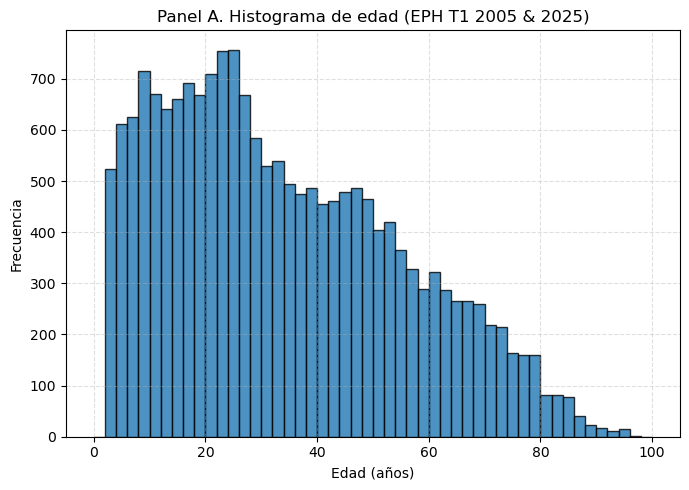

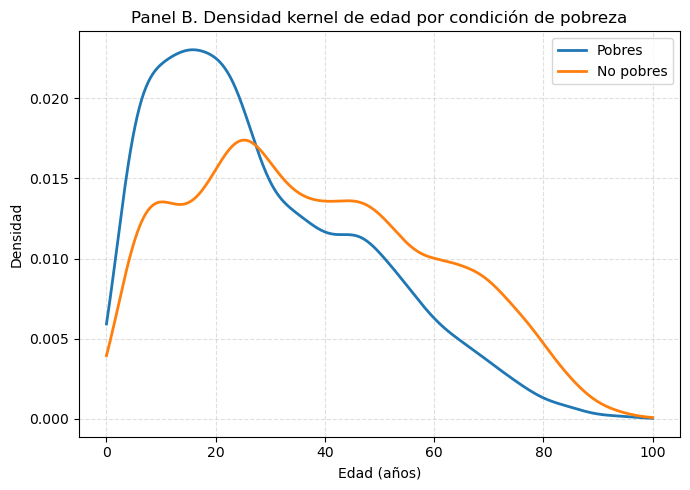

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

datos["edad2"] = datos["ch06"] ** 2

# Panel A: Histograma de edad 
plt.figure(figsize=(7,5))
plt.hist(datos["ch06"], bins=range(0, 101, 2), edgecolor="black", alpha=0.8)
plt.xlabel("Edad (años)")
plt.ylabel("Frecuencia")
plt.title("Panel A. Histograma de edad (EPH T1 2005 & 2025)")
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

# Panel B: Densidad (KDE) por condición de pobreza
# Series para cada grupo
edad_pobre = datos.loc[datos["pobre"] == 1, "ch06"].dropna().values
edad_nopobre = datos.loc[datos["pobre"] == 0, "ch06"].dropna().values

# Malla de evaluación
xgrid = np.linspace(0, 100, 500)

# KDE (usa regla de banda automática de scipy)
kde_pobre = gaussian_kde(edad_pobre) if len(edad_pobre) > 1 else None
kde_nopobre = gaussian_kde(edad_nopobre) if len(edad_nopobre) > 1 else None

plt.figure(figsize=(7,5))
if kde_pobre is not None:
    plt.plot(xgrid, kde_pobre(xgrid), label="Pobres", linewidth=2)
if kde_nopobre is not None:
    plt.plot(xgrid, kde_nopobre(xgrid), label="No pobres", linewidth=2)
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.title("Panel B. Densidad kernel de edad por condición de pobreza")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

### 2)

In [18]:
import numpy as np
import pandas as pd

# Parámetros (años por nivel)
PRI_YEARS, EGB_YEARS, SEC_YEARS = 6, 9, 6    # primario 6; EGB 9; secundario 6 (6+6)
POL_YEARS, TER_YEARS, UNI_YEARS, POS_YEARS = 3, 3, 5, 2

def clamp(x, lo, hi):
    if pd.isna(x):
        return np.nan
    return float(min(max(float(x), lo), hi))

def calcular_educ(row):
    c12 = row["ch12"]  # nivel más alto cursado/cursado (1..9)
    c13 = row["ch13"]  # finalizó ese nivel (1=Sí, 2=No, 9=Ns/Nr)
    y   = row["ch14"]  # último año aprobado (00..09, 98 esp., 99 Ns/Nr)

    if pd.isna(c12):
        return np.nan

    # Trato especiales de CH14
    if y in (98, 99):
        y = np.nan

    fin = 1 if c13 == 1 else 0  # sólo 1 = finalizó

    # 1 Jardín/preescolar → 0
    if c12 == 1:
        return 0.0

    # 2 Primario: 0..6 (si finalizó → 6)
    if c12 == 2:
        return float(PRI_YEARS) if fin == 1 else clamp(y, 0, PRI_YEARS)

    # 3 EGB: 0..9 (si finalizó → 9)
    if c12 == 3:
        return float(EGB_YEARS) if fin == 1 else clamp(y, 0, EGB_YEARS)

    # 4 Secundario: base 6 + 0..6 (si finalizó → 12)
    if c12 == 4:
        base = PRI_YEARS
        return float(base + SEC_YEARS) if fin == 1 else base + clamp(y, 0, SEC_YEARS)

    # 5 Polimodal: base 9 + 0..3 (si finalizó → 12)
    if c12 == 5:
        base = EGB_YEARS
        return float(base + POL_YEARS) if fin == 1 else base + clamp(y, 0, POL_YEARS)

    # 6 Terciario: base 12 + 0..3 (si finalizó → 12+3)
    if c12 == 6:
        base = PRI_YEARS + SEC_YEARS  # 12
        if fin == 1:
            return float(base + TER_YEARS)
        return base + clamp(y, 0, TER_YEARS)

    # 7 Universitario: base 12 + 0..5 (si finalizó → 12+5)
    if c12 == 7:
        base = PRI_YEARS + SEC_YEARS  # 12
        if fin == 1:
            return float(base + UNI_YEARS)
        return base + clamp(y, 0, UNI_YEARS)

    # 8 Posgrado: base 12 + 5 + 0..2 (si finalizó → 12+5+2)
    if c12 == 8:
        base = PRI_YEARS + SEC_YEARS + UNI_YEARS  # 17
        if fin == 1:
            return float(base + POS_YEARS)
        return base + clamp(y, 0, POS_YEARS)

    # 9 Educación especial (discapacidad): no se infiere (heterogéneo)
    if c12 == 9:
        return np.nan

    return np.nan

# Crear variable 'educ'
datos["educ"] = datos.apply(calcular_educ, axis=1).round(1)

# Estadística descriptiva solicitada
stats = datos["educ"].dropna().agg(
    promedio="mean", sd="std", min="min", p50="median", max="max"
).round(2)

print("Estadísticas de 'educ' (años de educación):")
print(stats)

Estadísticas de 'educ' (años de educación):
promedio     9.26
sd           4.63
min          0.00
p50         10.00
max         19.00
Name: educ, dtype: float64


Comentario: 
Como CH12 = 9 signfica “Educación especial” y CH14 = 98 es “Educación especial” no hay manera de traducirlo a “años de educación” estándar (0–12–17, etc.) entonces — lo dejamos como NaN.

### 3)

In [19]:
# --- FACTOR DEFLACTOR 2005 -> 2025 ---
cbt_valores = {2005: 205.07, 2025: 365_177.00} 
FACTOR_2005_A_2025 = cbt_valores[2025] / cbt_valores[2005]

# --- DEFLACTO A PRECIOS 2025 ---
datos["defl_2025"] = 1.0
datos.loc[datos["ano4"] == 2005, "defl_2025"] = FACTOR_2005_A_2025

# Variable final (a precios 2025)
datos["ingreso_total_familiar"] = datos["itf"] * datos["defl_2025"]

# Para que no se vean con connotación cientifica los resultados
pd.options.display.float_format = "{:.1f}".format  # una sola cifra decimal

# Chequeo rápido
print(datos[["ano4", "itf", "ingreso_total_familiar", "defl_2025"]].head(-20))

        ano4       itf  ingreso_total_familiar  defl_2025
0     2005.0     700.0               1246520.2     1780.7
1     2005.0     700.0               1246520.2     1780.7
2     2005.0     700.0               1246520.2     1780.7
3     2005.0     700.0               1246520.2     1780.7
4     2005.0     700.0               1246520.2     1780.7
...      ...       ...                     ...        ...
18599 2025.0 1280000.0               1280000.0        1.0
18600 2025.0 1280000.0               1280000.0        1.0
18601 2025.0 4300000.0               4300000.0        1.0
18602 2025.0 2810000.0               2810000.0        1.0
18603 2025.0 2810000.0               2810000.0        1.0

[18604 rows x 4 columns]


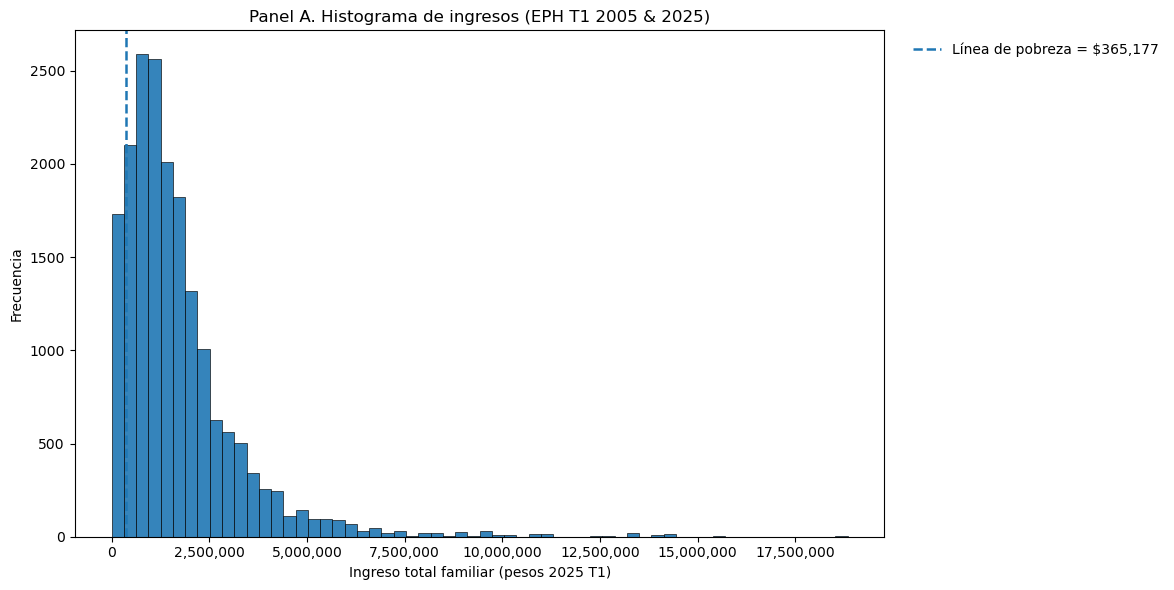

In [20]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

x      = pd.to_numeric(datos["ingreso_total_familiar"], errors="coerce") 
pobre  = pd.to_numeric(datos["pobre"], errors="coerce")                   # 1 pobres, 0 no pobres
umbral = 365177

# Panel A: Histograma 
fig, ax = plt.subplots(figsize=(14,6))   # hace el histograma más ancho
n, bins, patches = ax.hist(x, bins=60, edgecolor="black", linewidth=0.5, alpha=0.9)

# Leyenda al costado derecho, fuera del área del gráfico
ax.axvline(umbral, linestyle="--", linewidth=1.8, label="Línea de pobreza = $365,177")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), frameon=False)

# Sin notación científica
ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:,.0f}"))  # separador de miles para ingreso

ax.set_title("Panel A. Histograma de ingresos (EPH T1 2005 & 2025)")
ax.set_xlabel("Ingreso total familiar (pesos 2025 T1)")
ax.set_ylabel("Frecuencia")

plt.tight_layout(rect=[0, 0, 0.85, 1])   # ⟵ deja margen derecho para la leyenda
plt.show()

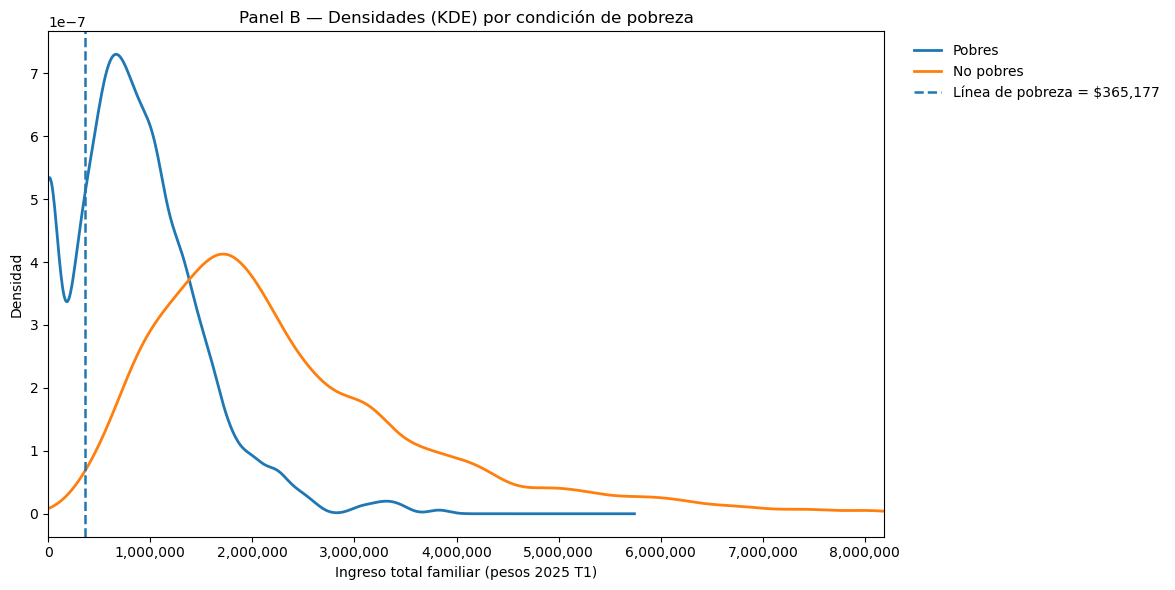

In [21]:
# Panel B: Distribuciones de kernels para pobres y no pobres 

# Recorte visual (cola derecha) --> Para que los ingresos muy altos no aplaste el gráfico
mask = x.notna() & (x <= np.nanpercentile(x, 99))
xv = x[mask]

# KDE
fig, ax = plt.subplots(figsize=(14,6))

# Curvas de densidad
for val, etiqueta in [(1, "Pobres"), (0, "No pobres")]:
    serie = xv[pobre[mask] == val]
    if serie.count() > 1:  # evita errores si hay muy pocos datos
        serie.plot(kind="kde", ax=ax, linewidth=2, label=etiqueta)

# Línea de pobreza (TP1) + leyenda al costado
ax.axvline(umbral, linestyle="--", linewidth=1.8, label="Línea de pobreza = $365,177")
ax.legend(loc="upper left", bbox_to_anchor=(1.02, 1), frameon=False)

# Sin notación científica y separador de miles
ax.ticklabel_format(style="plain", axis="x")
ax.xaxis.set_major_formatter(FuncFormatter(lambda v, pos: f"{v:,.0f}"))

ax.set_title("Panel B — Densidades (KDE) por condición de pobreza")
ax.set_xlabel("Ingreso total familiar (pesos 2025 T1)")
ax.set_ylabel("Densidad")
ax.set_xlim(0, xv.max())

plt.tight_layout(rect=[0, 0, 0.85, 1])  # deja margen derecho para la leyenda
plt.show()

### 4)

In [22]:
# Filtra solo para jefes de hogar
jefe = datos["ch03"] == 1

# Crear la variable SOLO para jefes/as (NaN fuera del grupo)
datos.loc[jefe, "horastrab"] = datos.loc[jefe, ["pp3e_tot", "pp3f_tot"]].sum(axis=1, min_count=1)

s = datos.loc[jefe, "horastrab"]

resumen = pd.Series({
    "promedio": s.mean(),
    "sd":       s.std(ddof=1),
    "min":      s.min(),
    "p50":      s.median(),
    "max":      s.max(),
    "N":        s.count()
}).round(2)

print(resumen.to_frame(name="horastrab").to_string())

          horastrab
promedio       29.9
sd             24.2
min             0.0
p50            30.0
max           126.0
N            4236.0


In [23]:
# % de jefes/as que trabajaron >0 horas (denominador = N no nulos)
share_trab = (s > 0).sum() / s.notna().sum() * 100

print(
    f"Entre jefes/as de hogar (N={resumen['N']}), las horas trabajadas totales "
    f"tienen un promedio de {resumen['promedio']:.1f} horas semanales (sd={resumen['sd']:.1f}), "
    f"con un rango de {resumen['min']:.0f} a {resumen['max']:.0f} y una mediana de {resumen['p50']:.0f}. "
    f"Se observa que el {share_trab:.1f}% de los jefes/as declara trabajar >0 horas. "
    f"Esto sugiere una distribución concentrada en jornadas cercanas al tiempo completo, "
    f"con algunos casos de alta carga horaria."
)

Entre jefes/as de hogar (N=4236.0), las horas trabajadas totales tienen un promedio de 29.9 horas semanales (sd=24.2), con un rango de 0 a 126 y una mediana de 30. Se observa que el 73.1% de los jefes/as declara trabajar >0 horas. Esto sugiere una distribución concentrada en jornadas cercanas al tiempo completo, con algunos casos de alta carga horaria.


### 5)

- Trabajamos con la tabla datos (ya filtrada a NOA-40).
- Definimos resumen_por(df): verificamos que exista pobre, normalizamos True/False a 1/0 y calculamos cuatro cosas, total de filas, NAs en pobre, cantidad de pobres (==1) y de no pobres (==0).
- Separamos por año: df05 (ano4==2005) y df25 (ano4==2025).
- Obtenemos los resúmenes aplicando resumen_por a df05, df25 y al total (datos).
- Contamos “variables limpias y homogeneizadas”: usamos contar_vars_limpias(NOTEBOOK_PATH) si lo tenemos, si no, podemos fijar ese número manualmente (lo demas no cambia).
- Armamos la Tabla 1 con columnas 2005 / 2025 / Total y las filas exactas que pide la consigna (totales, NAs en pobre, # pobres, # no pobres, # variables limpias/homogeneizadas).
- Imprimimos la tabla con separadores de miles y, aparte, generamos comentarios automáticos por corte: N, % de NAs en pobre e incidencia de pobreza sobre los casos válidos.
- Mostramos la lista de variables consideradas limpias/homogeneizadas.

In [24]:
# tablita con un resumen de la base final (region NOA - 40)
import os, re
import pandas as pd

def resumen_por(df: pd.DataFrame) -> tuple[int, int, int, int]:
    """
    total, NAs en 'pobre', # pobres (==1 o True), # no pobres (==0 o False)
    """
    total = len(df)
    if "pobre" not in df.columns:
        raise KeyError("No se encontró la columna 'pobre' (debe venir del TP1).")
    s = df["pobre"]
    na_pobre = s.isna().sum()
    # normalizo a {0,1,NaN}: acepta 1/0/True/False (evita is True/False)
    s_bin = s.replace({True: 1, False: 0})
    n_pobres = (s_bin == 1).sum()
    n_no_pobres = (s_bin == 0).sum()
    return int(total), int(na_pobre), int(n_pobres), int(n_no_pobres)

df05 = datos[datos["ano4"] == 2005]
df25 = datos[datos["ano4"] == 2025]

t05, na05, p05, np05 = resumen_por(df05)
t25, na25, p25, np25 = resumen_por(df25)
TT,  NAt,  Pt,  NPt  = resumen_por(datos)

# conteo de variables limpias/homogeneizadas
VARS_LIMPIAS = ["cat_inac","cat_ocup","ch04","ch06","ch07","ch08","ch09","ch10",
                "ch12","ch13","ch14","ch15","ch16","estado","nivel_ed","pp3e_tot",
                "pp3f_tot","region"]
def contar_vars_limpias():
    lst = [v for v in VARS_LIMPIAS if v in datos.columns]
    return len(lst), lst
cant_vars_limpias, lista_limpias = contar_vars_limpias()

# tabla 1
tabla1 = pd.DataFrame(
    {
        "2005": [t05, na05, p05, np05, cant_vars_limpias],
        "2025": [t25, na25, p25, np25, cant_vars_limpias],
        "Total":[TT,  NAt,  Pt,  NPt,  cant_vars_limpias],
    },
    index=[
        "Cantidad observaciones",
        "Cantidad de observaciones con NAs en la variable 'pobre'",
        "Cantidad de Pobres",
        "Cantidad de No Pobres",
        "Cantidad de variables limpias y homogeneizadas",
    ],
)

print("\nTabla 1. Resumen de la base final para la región NOA (40)\n")
print(tabla1.applymap(lambda x: f"{x:,.0f}").to_string())

def comentario(df: pd.DataFrame, etiqueta: str) -> str:
    n = len(df)
    s = df["pobre"]
    na = s.isna().sum()
    s_bin = s.replace({True: 1, False: 0})
    validos = s_bin.dropna()
    inc = validos.mean()*100 if len(validos) else float("nan")
    return (f"{etiqueta}: N={n:,}; NAs en 'pobre'={na:,} "
            f"({(na/max(n,1))*100:.1f}%). Incidencia de pobreza (sobre válidos): {inc:.1f}%.")

print("\nComentarios:")
print(comentario(df05, "2005"))
print(comentario(df25, "2025"))
print(comentario(datos, "Total NOA (40)"))

print("\nVariables contadas como limpias/homogeneizadas:")
print(", ".join(lista_limpias))


Tabla 1. Resumen de la base final para la región NOA (40)

                                                           2005   2025   Total
Cantidad observaciones                                    9,009  9,615  18,624
Cantidad de observaciones con NAs en la variable 'pobre'      0      0       0
Cantidad de Pobres                                        4,088  4,917   9,005
Cantidad de No Pobres                                     4,921  4,698   9,619
Cantidad de variables limpias y homogeneizadas               18     18      18

Comentarios:
2005: N=9,009; NAs en 'pobre'=0 (0.0%). Incidencia de pobreza (sobre válidos): 45.4%.
2025: N=9,615; NAs en 'pobre'=0 (0.0%). Incidencia de pobreza (sobre válidos): 51.1%.
Total NOA (40): N=18,624; NAs en 'pobre'=0 (0.0%). Incidencia de pobreza (sobre válidos): 48.4%.

Variables contadas como limpias/homogeneizadas:
cat_inac, cat_ocup, ch04, ch06, ch07, ch08, ch09, ch10, ch12, ch13, ch14, ch15, ch16, estado, nivel_ed, pp3e_tot, pp3f_tot, region


/var/folders/wm/q9fbw11d32v_7s6k6xg0jlh40000gn/T/ipykernel_33578/2274020847.py:53: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  print(tabla1.applymap(lambda x: f"{x:,.0f}").to_string())


## Parte II: Métodos No Supervisados

### 1)

- Preparamos las seis variables del PCA: edad (y su cuadrado), educación, ingreso total familiar (ITF), miembros del hogar y horas trabajadas.
- Calculamos la matriz de correlaciones de Pearson con casos completos (dropna()), para que el N sea consistente con el que usaremos en el PCA.
- Renombramos las variables a etiquetas legibles solo para el gráfico.
- Graficamos un heatmap con anotaciones a dos decimales, paleta divergente centrada en 0 y límites [-1, 1], como el codigo de la tutorial.

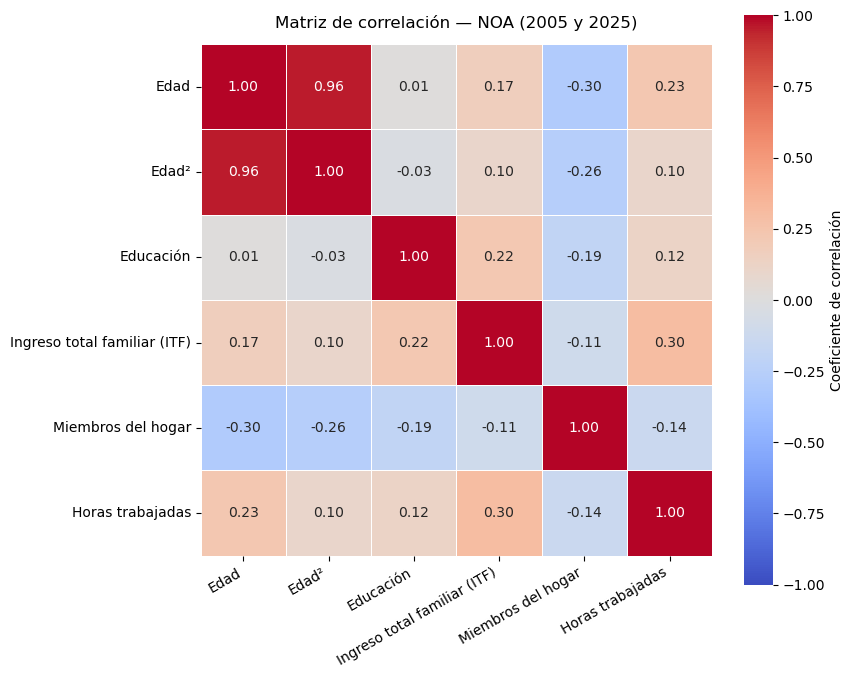

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nos aseguramos que las 6 variables estan definidas correctamente para la matriz 
hog_id_col = "CODUSU" if "CODUSU" in datos.columns else "codusu"
datos["miembros_hogar"] = datos.groupby(hog_id_col)[hog_id_col].transform("size")  # IX_TOT por CODUSU

datos["edad"]  = pd.to_numeric(datos["ch06"], errors="coerce")
datos["edad2"] = datos["edad"]**2
datos["educ"]  = pd.to_numeric(datos["nivel_ed"], errors="coerce")
datos["itf"]   = pd.to_numeric(datos["itf"], errors="coerce")
datos["horastrab"] = pd.to_numeric(
    datos["pp3e_tot"] if "pp3e_tot" in datos.columns else datos["pp3f_tot"],
    errors="coerce"
)

vars_corr = ["edad","edad2","educ","itf","miembros_hogar","horastrab"]

corr = datos[vars_corr].dropna().corr(method="pearson")

# etiquetas
label_map = {
    "edad": "Edad",
    "edad2": "Edad²",
    "educ": "Educación",
    "itf": "Ingreso total familiar (ITF)",
    "miembros_hogar": "Miembros del hogar",
    "horastrab": "Horas trabajadas",
}
corr_plot = corr.rename(index=label_map, columns=label_map)

# plot
plt.figure(figsize=(8.6, 7.2))
ax = sns.heatmap(
    corr_plot,
    annot=True, fmt=".2f",
    vmin=-1, vmax=1, center=0,
    cmap="coolwarm",
    square=True,
    linewidths=0.6, linecolor="white",
    cbar_kws={"label": "Coeficiente de correlación"}
)
ax.set_title("Matriz de correlación — NOA (2005 y 2025)", pad=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.tight_layout()
plt.show()

### 2)

- Definimos vars_pca con esos seis predictores.
- Tomamos casos completos (dropna() sobre las seis) porque el PCA exige no tener valores faltantes, mostramos el N efectivo.
- Estandarizamos con StandardScaler (media 0, varianza 1) para que todas las variables tengan la misma escala y el PCA no quede dominado por unidades diferentes.
- Ajustamos un PCA de 2 componentes y obtenemos los puntajes (coordenadas PC1, PC2) y la varianza explicada por cada componente.
- Calculamos límites de ejes comunes a partir del percentil 99 de |scores| con un pequeño padding, estos límites se reutilizan luego en el gráfico que viene (loadings) para que ambas figuras sean comparables.
- Graficamos la dispersión de puntajes PC1–PC2 con líneas guía en 0, rotulamos los ejes con el % de varianza explicada y usamos los límites comunes.
- Imprimimos los porcentajes de varianza (PC1, PC2 y la suma) para facilitar el comentario en el informe.

N observaciones completas (PCA): 13,362


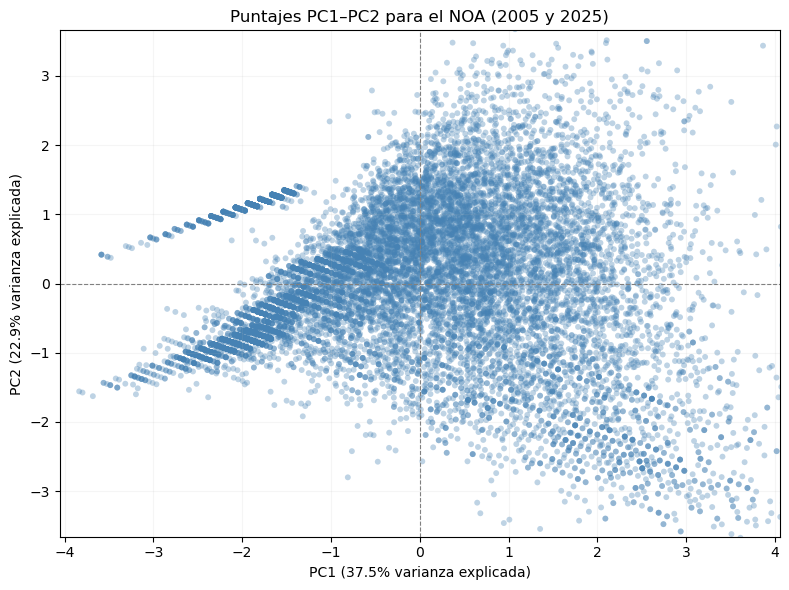


Varianza explicada:
  PC1 = 37.5%
  PC2 = 22.9%
  PC1+PC2 = 60.3%


In [26]:
#pc1 y pc2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# devuelta nos aseguramos de tener las variables en orden
hog_id_col = "CODUSU" if "CODUSU" in datos.columns else "codusu"             
datos["miembros_hogar"] = datos.groupby(hog_id_col)[hog_id_col].transform("size")
datos["edad"]  = pd.to_numeric(datos["ch06"], errors="coerce")
datos["edad2"] = datos["edad"]**2
datos["educ"]  = pd.to_numeric(datos["nivel_ed"], errors="coerce")
datos["itf"]   = pd.to_numeric(datos["itf"], errors="coerce")

# horas para TODA la población (no pisa tu 'horastrab' del Ej. 4 si ya existe)
a = pd.to_numeric(datos.get("pp3e_tot"), errors="coerce")
b = pd.to_numeric(datos.get("pp3f_tot"), errors="coerce")
datos["horastrab_all"] = pd.concat([a, b], axis=1).sum(axis=1, min_count=1)   


vars_pca = ["edad","edad2","educ","itf","miembros_hogar","horastrab_all"]


# 1) nos fijamos en los casos completos (PCA necesita filas sin NA en las 6 variables)
X = datos.loc[:, vars_pca].dropna()
print(f"N observaciones completas (PCA): {len(X):,}")

# 2) Estandarizamos
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X.values)

# 3) PCA (2 componentes) + scores
pca = PCA(n_components=2, random_state=42)
scores = pca.fit_transform(X_scaled)
var_ratio = pca.explained_variance_ratio_

# 4) Límites compartidos
lims = np.percentile(np.abs(scores[:, :2]), 99, axis=0)
padx, pady = lims[0]*0.15, lims[1]*0.15
XLIM = (-lims[0]-padx, lims[0]+padx)
YLIM = (-lims[1]-pady, lims[1]+pady)

# 5) Gráfico de dispersión de los puntajes
plt.figure(figsize=(8, 6))
plt.scatter(scores[:, 0], scores[:, 1], s=18, alpha=0.35, color="steelblue", edgecolors="none")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.8)
plt.xlim(*XLIM); plt.ylim(*YLIM)
plt.xlabel(f"PC1 ({var_ratio[0]*100:.1f}% varianza explicada)")
plt.ylabel(f"PC2 ({var_ratio[1]*100:.1f}% varianza explicada)")
plt.title("Puntajes PC1–PC2 para el NOA (2005 y 2025)")
plt.grid(alpha=0.12)
plt.tight_layout()
plt.show()

# números para comentar despues en el informe
print("\nVarianza explicada:")
print(f"  PC1 = {var_ratio[0]*100:.1f}%")
print(f"  PC2 = {var_ratio[1]*100:.1f}%")
print(f"  PC1+PC2 = {var_ratio.sum()*100:.1f}%")

##### tenemos 13 mil observaciones porque la variable horas trabajadas tenia algunos Na

In [27]:
vars_pca = ["edad","edad2","educ","itf","miembros_hogar","horastrab_all"]

print("Antes de dropna:", datos[vars_pca].shape)
print("Después de dropna:", datos[vars_pca].dropna().shape)

print("\n% de NAs por variable (sobre toda la región/periodo usados):")
print((datos[vars_pca].isna().mean().sort_values(ascending=False)*100).round(1))

print("\nFilas completas (todas las 6 sin NA):",
      datos[vars_pca].notna().all(1).sum())

Antes de dropna: (18624, 6)
Después de dropna: (13362, 6)

% de NAs por variable (sobre toda la región/periodo usados):
horastrab_all    28.3
edad              0.0
edad2             0.0
educ              0.0
itf               0.0
miembros_hogar    0.0
dtype: float64

Filas completas (todas las 6 sin NA): 13362


### 3)

- Definimos las seis variables del PCA y tomamos casos completos (sin NaN).
- Estandarizamos (media 0, varianza 1) y ajustamos un PCA con 2 componentes.
- Calculamos scores y loadings, fijamos límites y dibujamos el biplot con etiquetas despejadas.
- Reportamos la varianza explicada para comentar resultados.

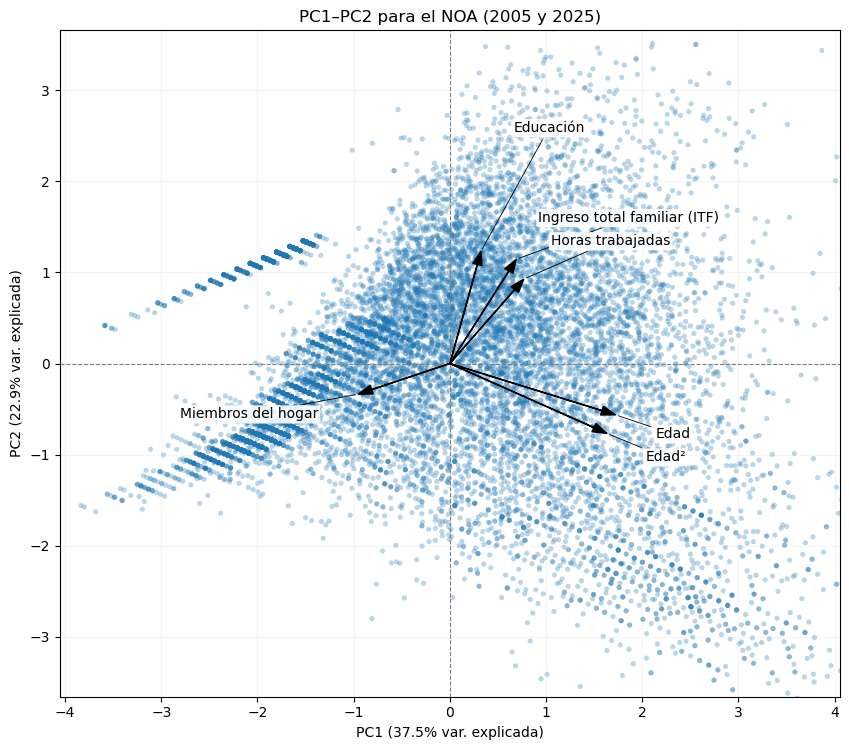

Varianza explicada: [0.37468991 0.22866392]

Loadings (pca.components_):
 [[ 0.62020917  0.58771477  0.11640475  0.24864975 -0.34325149  0.27700829]
 [-0.2597134  -0.35357035  0.56792963  0.52747251 -0.15495707  0.42749731]]


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# devuelta nos aseguramos de tener las variables en orden
hog_id_col = "CODUSU" if "CODUSU" in datos.columns else "codusu"             
datos["miembros_hogar"] = datos.groupby(hog_id_col)[hog_id_col].transform("size")
datos["edad"]  = pd.to_numeric(datos["ch06"], errors="coerce")
datos["edad2"] = datos["edad"]**2
datos["educ"]  = pd.to_numeric(datos["nivel_ed"], errors="coerce")
datos["itf"]   = pd.to_numeric(datos["itf"], errors="coerce")

# horas para TODA la población (no pisa tu 'horastrab' del Ej. 4 si ya existe)
a = pd.to_numeric(datos.get("pp3e_tot"), errors="coerce")
b = pd.to_numeric(datos.get("pp3f_tot"), errors="coerce")
datos["horastrab_all"] = pd.concat([a, b], axis=1).sum(axis=1, min_count=1)   

vars_pca = ["edad","edad2","educ","itf","miembros_hogar","horastrab_all"]    

# 1) Casos completos
X = datos.loc[:, vars_pca].dropna()

# 2) Estandarizar
scaler = StandardScaler(with_mean=True, with_std=True)
X_scaled = scaler.fit_transform(X.values)

# 3) PCA (2 componentes) + scores + loadings
pca = PCA(n_components=2, random_state=42)
scores = pca.fit_transform(X_scaled)
vr = pca.explained_variance_ratio_
load = pca.components_.T
sdev = np.sqrt(pca.explained_variance_)

# 4) Etiquetas legibles
label_map = {
    "edad": "Edad",
    "edad2": "Edad²",
    "educ": "Educación",
    "itf": "Ingreso total familiar (ITF)",
    "miembros_hogar": "Miembros del hogar",
    "horastrab_all": "Horas trabajadas",
}

# 5) Límites: reusar los del gráfico de scores si existen; si no, calcular
try:
    XLIM; YLIM
except NameError:
    lims = np.percentile(np.abs(scores[:, :2]), 99, axis=0)
    padx, pady = lims[0]*0.15, lims[1]*0.15
    XLIM = (-lims[0]-padx, lims[0]+padx)
    YLIM = (-lims[1]-pady, lims[1]+pady)

# 6) Escalar flechas para que entren (auto, tope k=2.0)
base = load * sdev
maxx = np.max(np.abs(base[:,0])); maxy = np.max(np.abs(base[:,1]))
kx = 0.85*(XLIM[1]-0)/(2*maxx) if maxx>0 else 1.0
ky = 0.85*(YLIM[1]-0)/(2*maxy) if maxy>0 else 1.0
k  = min(2.0, kx, ky)
vec = base * k

# 7) Gráfico con la misma escala que el anterior
fig, ax = plt.subplots(figsize=(8.6, 7.6))
ax.scatter(scores[:, 0], scores[:, 1], s=14, alpha=0.30, edgecolors="none")
ax.axhline(0, color="gray", ls="--", lw=0.8)
ax.axvline(0, color="gray", ls="--", lw=0.8)
ax.set_xlim(*XLIM); ax.set_ylim(*YLIM)

# posiciones de etiquetas  para que no se superpongan
DR_FAC = 0.10
MIN_DIST_PX = 22
ITERS = 200
STEP = 0.35

xr = ax.get_xlim()[1] - ax.get_xlim()[0]
yr = ax.get_ylim()[1] - ax.get_ylim()[0]
L = np.zeros_like(vec)

BASE_OFF = 0.06 * min(xr, yr)   # pequeño desplazamiento radial para TODAS
EXTRA_EDU = 0.12 * min(xr, yr)  # extra SOLO para Educación

for i, v in enumerate(vars_pca):
    a = np.arctan2(vec[i,1], vec[i,0])                # dirección de la flecha
    off = BASE_OFF + (EXTRA_EDU if v == "educ" else 0)
    L[i,0] = vec[i,0] + off*np.cos(a)                 # mover en la misma dirección
    L[i,1] = vec[i,1] + off*np.sin(a)

# Recorte al marco
mx, my = 0.04*xr, 0.04*yr
L[:,0] = np.clip(L[:,0], ax.get_xlim()[0]+mx, ax.get_xlim()[1]-mx)
L[:,1] = np.clip(L[:,1], ax.get_ylim()[0]+my, ax.get_ylim()[1]-my)

# Dibujamos las flechas + etiquetas
for i, v in enumerate(vars_pca):
    x, y = vec[i]
    ax.arrow(0, 0, x, y, color="black", width=0.003, head_width=0.10,
             length_includes_head=True, zorder=3)
    ha = "left"  if L[i,0] >= x else "right"
    va = "bottom" if L[i,1] >= y else "top"
    ax.annotate(
        label_map.get(v, v),
        xy=(x, y), xytext=(L[i,0], L[i,1]),
        textcoords="data", ha=ha, va=va,
        bbox=dict(fc="white", ec="none", alpha=0.9, boxstyle="round,pad=0.15"),
        arrowprops=dict(arrowstyle="-", lw=0.6, color="black"),
        zorder=4
    )

ax.set_xlabel(f"PC1 ({vr[0]*100:.1f}% var. explicada)")
ax.set_ylabel(f"PC2 ({vr[1]*100:.1f}% var. explicada)")

ax.set_title("PC1–PC2 para el NOA (2005 y 2025)")
ax.grid(alpha=0.12)
plt.tight_layout()
plt.show()

print("Varianza explicada:", vr)
print("\nLoadings (pca.components_):\n", pca.components_)

### 4)

Ademas de graficar la varianza explicada por los 6 componentes para visualizar la importancia de cada componente por separado, también incluimos la varianza acumulada (en rojo) para visualizar cuánta información explican en conjunto los primeros 6 componentes 

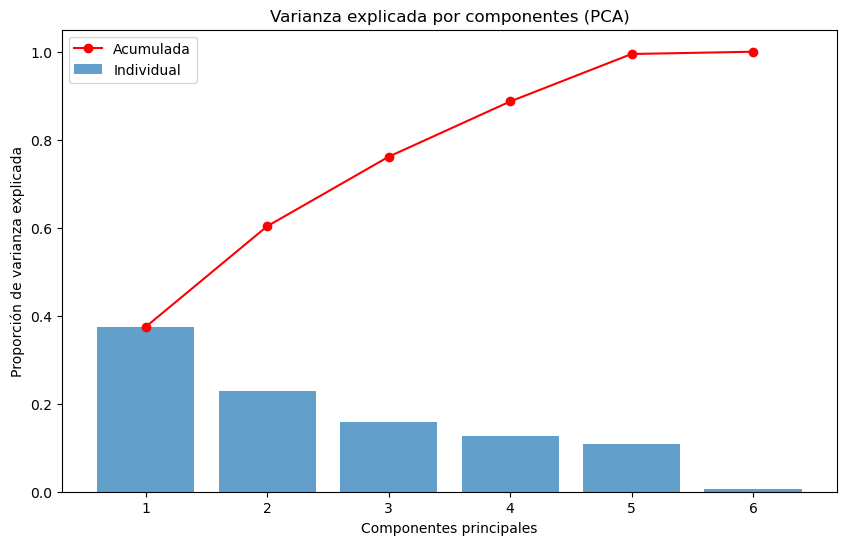

Varianza explicada individual: [0.37468991 0.22866392 0.15799447 0.12556504 0.10791642 0.00517024]
Varianza explicada acumulada: [0.37468991 0.60335383 0.7613483  0.88691334 0.99482976 1.        ]


In [29]:
#4
# PCA con los 6 componentes
pca_full = PCA(n_components=6)
pca_full.fit(X_scaled)

# Varianza explicada individual y acumulada
explained_var = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained_var)

# Gráfico: barras (individual) + línea (acumulada)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7, label="Individual")
ax.plot(range(1, len(cum_explained)+1), cum_explained, marker="o", color="red", label="Acumulada")

ax.set_title("Varianza explicada por componentes (PCA)")
ax.set_xlabel("Componentes principales")
ax.set_ylabel("Proporción de varianza explicada")
ax.legend()
plt.show()

# Para comentar en el informe
print("Varianza explicada individual:", explained_var)
print("Varianza explicada acumulada:", cum_explained)


### 5) a.

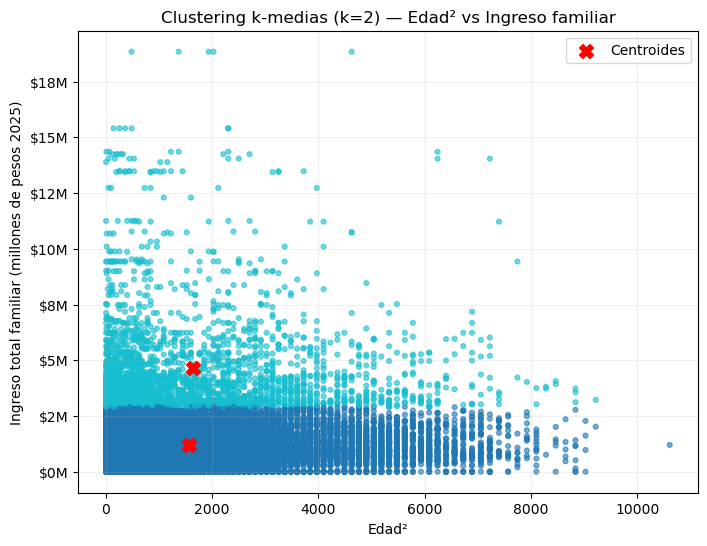

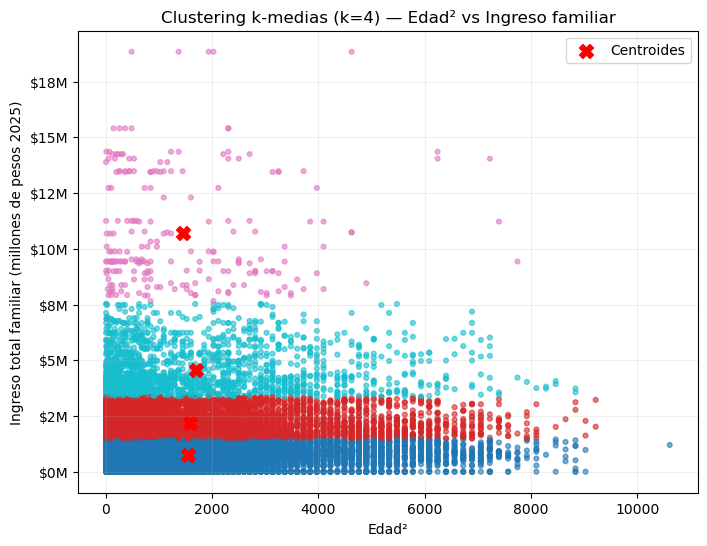

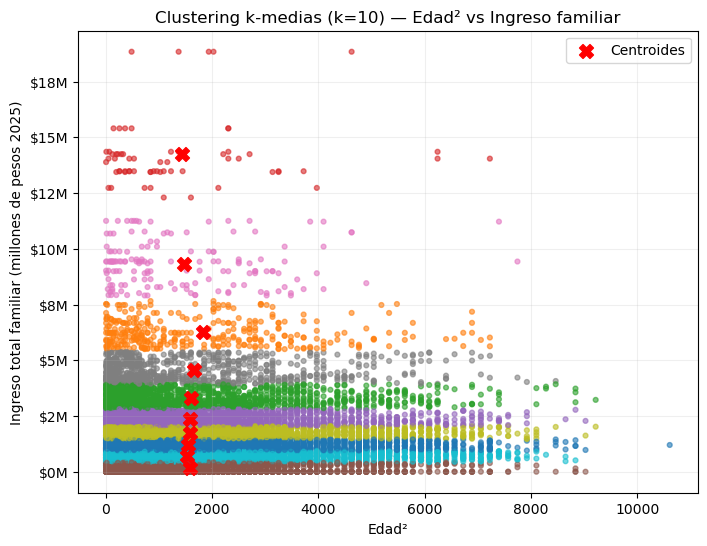

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1) Seleccionamos solo las columnas de interés
X_cluster = datos[["edad2", "ingreso_total_familiar"]].dropna()

# Función para formatear en millones
def millones(x, pos):
    return f"${x*1e-6:.0f}M"

# 2) Probamos k-medias con k = 2, 4 y 10
for k in [2, 4, 10]:
    # Aplicamos KMeans con 20 inicializaciones
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=123)
    X_cluster[f"cluster_{k}"] = kmeans.fit_predict(
        X_cluster[["edad2", "ingreso_total_familiar"]]
    )
    
    # 3) Graficar resultados
    plt.figure(figsize=(8,6))
    plt.scatter(
        X_cluster["edad2"], X_cluster["ingreso_total_familiar"],
        c=X_cluster[f"cluster_{k}"], cmap="tab10", alpha=0.6, s=12
    )
    # Marcar centroides
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:,0], centers[:,1], c="red", s=100, marker="X", label="Centroides")
    
    plt.xlabel("Edad²")
    plt.ylabel("Ingreso total familiar (millones de pesos 2025)")
    plt.title(f"Clustering k-medias (k={k}) — Edad² vs Ingreso familiar")
    plt.legend()
    plt.grid(alpha=0.2)
    
    #aplicar el formateador al eje Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(millones))
    
    plt.show()



### 5) b.

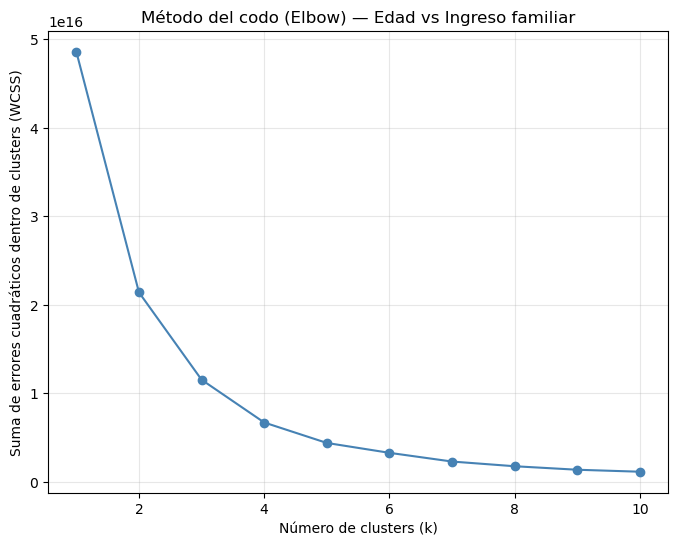

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1) Preparamos las variables que usamos en la parte A: edad e ingreso_total_familiar
X_cluster = datos[["edad2", "ingreso_total_familiar"]].dropna()

# 2) Guardamos la medida de disimilitud (inertia) para k=1,...,10
inertias = []
ks = range(1, 11)

for k in ks:
    kmeans = KMeans(n_clusters=k, n_init=20, random_state=42)
    kmeans.fit(X_cluster)
    inertias.append(kmeans.inertia_)

# 3) Graficamos el método del codo
plt.figure(figsize=(8,6))
plt.plot(ks, inertias, marker="o", linestyle="-", color="steelblue")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Suma de errores cuadráticos dentro de clusters (WCSS)")
plt.title("Método del codo (Elbow) — Edad vs Ingreso familiar")
plt.grid(alpha=0.3)
plt.show()


### 6)

Decimos hacer un dendograma recortado para facilitar la lectura del mismo, ya que los ID de la muestra se solapan al ser muchas observaciones, por lo que recortamos los datos usando truncate_mode y fijando p=5 como numero de nivel, para que la visualizacion sea mucho mas clara

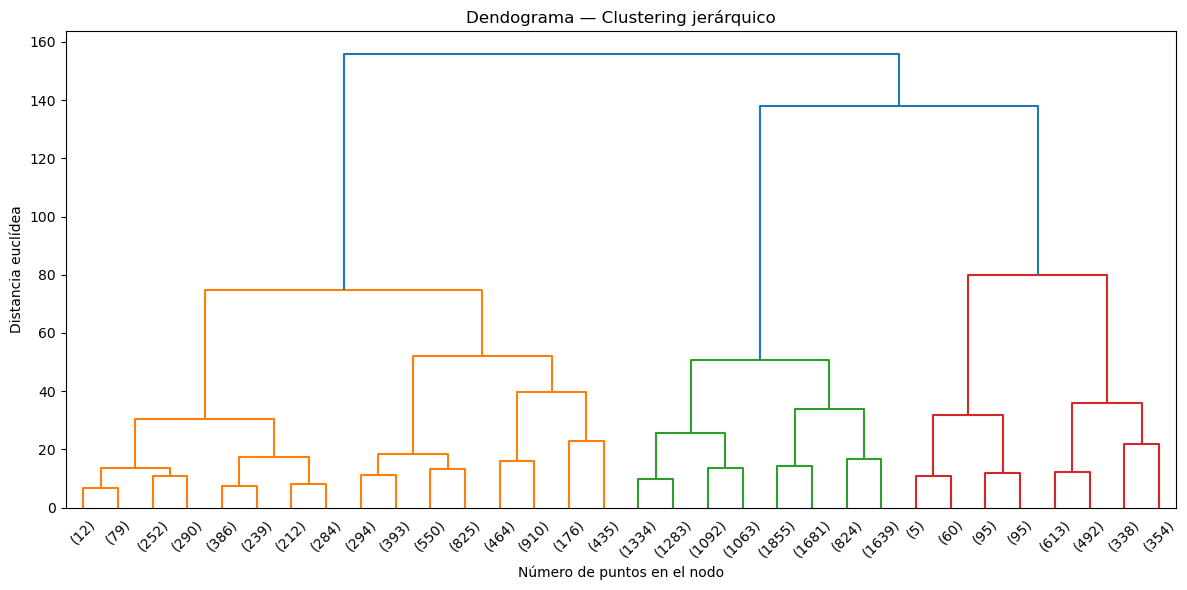

In [32]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Seleccionamos variables
X = datos[["edad2", "ingreso_total_familiar"]].dropna()

# Estandarizamos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Matriz de vínculos
Z = linkage(X_scaled, method="ward")

# Dendrograma recortado
plt.figure(figsize=(12,6))
dendrogram(
    Z,
    truncate_mode="level",  # modo de truncar
    p=4,  # menos niveles visibles → menos números
    leaf_rotation=45,
    leaf_font_size=10,
    show_contracted=False
)

plt.title("Dendograma — Clustering jerárquico")
plt.xlabel("Número de puntos en el nodo")
plt.ylabel("Distancia euclídea")
plt.tight_layout()
plt.show()



### 7) opcional

In [33]:
!pip install kmodes


In [34]:
#Clustering K-modes con dummies de la EPH
from kmodes.kmodes import KModes
import pandas as pd

# 1) Seleccionamos todas las variables dummies de la base, (excepto la variable objetivo "pobre")
vars_kmodes = [c for c in datos.columns if c not in ["pobre"]]

# Nos quedamos solo con observaciones completas
X_kmodes = datos[vars_kmodes].dropna()
y_pobre = datos.loc[X_kmodes.index, "pobre"]  # para comparar contra pobre

print(f"Usamos {X_kmodes.shape[1]} variables para K-modes y {X_kmodes.shape[0]} observaciones.")

# 2) Función auxiliar para correr K-modes y mostrar resultados
def correr_kmodes(X, y, k):
    km = KModes(n_clusters=k, init="Huang", n_init=20, verbose=0, random_state=123)
    clusters = km.fit_predict(X)

    # Tabulamos contra pobreza
    tabla = pd.crosstab(clusters, y, normalize="index") * 100
    print(f"\nResultados con k={k}:")
    print(tabla.round(1))
    return tabla

# 3) Ejecutar para k=2, k=4 y k=10
res_k2 = correr_kmodes(X_kmodes, y_pobre, k=2)
res_k4 = correr_kmodes(X_kmodes, y_pobre, k=4)
res_k10 = correr_kmodes(X_kmodes, y_pobre, k=10)

Usamos 35 variables para K-modes y 6645 observaciones.

Resultados con k=2:
pobre    0    1
row_0          
0     49.4 50.6
1     54.0 46.0

Resultados con k=4:
pobre    0    1
row_0          
0     62.0 38.0
1     48.7 51.3
2     63.3 36.7
3     38.1 61.9

Resultados con k=10:
pobre    0    1
row_0          
0     60.2 39.8
1     65.8 34.2
2     24.5 75.5
3     64.7 35.3
4     48.7 51.3
5     39.6 60.4
6     40.4 59.6
7     53.4 46.6
8     35.9 64.1
9     67.4 32.6
